[Датасет, использованный в исследовании](https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog)


__Цель__ исследования: Проследить влияние различных характеристик машин, собранных с объявлений на сайтах по продаже машин, на цену, за которая машина продается. 

__Задачи:__ Провести 

__Актуальность__: В описании к данному датасету сказано, что он собран 2 декабря 2019 года. То есть данные достаточно свежие, и относятся к предкоронавирусному, то есть предкризисному периоду. Данные содержат типичные характеристики машин, и их цену продажи, что в теории позволит выявить закономерности присущие всем рынкам по продаже машин.

In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
import pylab

In [183]:
df = pd.read_csv('cars.csv')

Cырая таблица, загруженная с Kaggle:

In [184]:
df.head(5) 

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


Убираем странные переменные:

In [185]:
df = df.drop(columns=["feature_0", "feature_1", "feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7",
                 "feature_8", "feature_9"]) 

In [186]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


Какие закономерности могут быть в данных и какие закономерности интересно исследовать?
    
1. Чем больше значение переменной пробег (`odometer_value`) , тем меньше цена машины.     

2. Чем старше машина (`year_produced`), тем может быть ее цена меньше, хотя совершенно не факт.

3. Интересно проследить, какая зависимость цены от типа бензина, на котром ездит машина (`engine_type`). В нашем исследовании мы будем рассматривать только 2 типа - это бензин и дизель. 

4. Скорее всего, чем больше литраж двигателя (`engine_capacity`), тем мощнее машина, и тем дороже она будет стоить.

5. Интересно как влияет на цену количество фото в объявлении (`number_of_photos`).


__Гипотезы:__ 

1. Можно проверить различие между переменными `engine_fuel` и `engine_type`. Нужно ли использовать обе, потому что кажется, что можно ограничится только `engine_type`
2. Гипотезу на совместную незначимость коэффициентов 

Определяем категориальные и числовые переменные:

In [187]:
numeric_data = df.select_dtypes([np.number, np.int])
numeric_features = numeric_data.columns
print(numeric_features)

Index(['odometer_value', 'year_produced', 'engine_capacity', 'price_usd',
       'number_of_photos', 'up_counter', 'duration_listed'],
      dtype='object')


C:\Users\lashm\AppData\Local\Temp\ipykernel_2296\2934970324.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_data = df.select_dtypes([np.number, np.int])


In [188]:
categorical = list(df.dtypes[(df.dtypes == "object") | (df.dtypes == "bool")].index)
print(categorical)

['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_has_gas', 'engine_type', 'body_type', 'has_warranty', 'state', 'drivetrain', 'is_exchangeable', 'location_region']


Убираем почти все категориальные переменные из исследования, оставляем дамми переменные:

In [189]:
df = df[['odometer_value', 
    'year_produced', 
    'engine_capacity', 
    'number_of_photos', 
    'duration_listed', 
     'transmission', 
     'engine_type',
      "engine_fuel", # потенциально ненужный признак
      "engine_has_gas", # потенциально ненужный признак
     'has_warranty', 
     'is_exchangeable', 
     'price_usd']] # Y - зависимая переменная

In [190]:
df["engine_fuel"].value_counts()

gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: engine_fuel, dtype: int64

Будем рассматривать только переменные `engine_fuel`, равные gasoline или diesel

In [191]:
df = df[(df["engine_fuel"] == "gasoline") | (df["engine_fuel"] == "diesel")]

Переменная `engine_has_gas` получается неинформативной, удаляем её:

In [192]:
df["engine_has_gas"].value_counts()

False    36937
Name: engine_has_gas, dtype: int64

In [193]:
df = df.drop(columns = "engine_has_gas")

In [194]:
df.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,price_usd
0,190000,2010,2.5,9,16,automatic,gasoline,gasoline,False,False,10900.00
1,290000,2002,3.0,12,83,automatic,gasoline,gasoline,False,True,5000.00
2,402000,2001,2.5,4,151,automatic,gasoline,gasoline,False,True,2800.00
3,10000,1999,3.0,9,86,mechanical,gasoline,gasoline,False,True,9999.00
4,280000,2001,2.5,14,7,automatic,gasoline,gasoline,False,True,2134.11


In [200]:
df["is_exchangeable"].value_counts()

False    23958
True     12979
Name: is_exchangeable, dtype: int64

Таким образом будем учитывать только машины, которые ездят либо на бензине, либо на дизеле в нашем исследовании

Преобразовываем переменные `transmission`, `engine_type`, `engine_fuel`, `has_warranty`, `is_exchangeable` в дамми переменые: 

In [201]:
# df = df[df["engine_type"] != "electric"]
filt1 = (df["transmission"] == "mechanical")
filt2 = (df["transmission"] == "automatic")

filt3 = (df["has_warranty"] == True)
filt4 = (df["has_warranty"] == False)

filt5 = (df["is_exchangeable"] == True)
filt6 = (df["is_exchangeable"] == False)

filt7 = (df["engine_type"] == "gasoline")
filt8 = (df["engine_type"] == "diesel")

filt9 = (df["engine_fuel"] == "gasoline")
filt10 = (df["engine_fuel"] == "diesel")


df.loc[filt1, "transmission"] = 1
df.loc[filt2, "transmission"] = 0

df.loc[filt3, "has_warranty"] = 1
df.loc[filt4, "has_warranty"] = 0

df.loc[filt5, "is_exchangeable"] = 1
df.loc[filt6, "is_exchangeable"] = 0

df.loc[filt7, "engine_type"] = 1
df.loc[filt8, "engine_type"] = 0

df.loc[filt9, "engine_fuel"] = 1
df.loc[filt10, "engine_fuel"] = 0

In [203]:
df.head()

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,price_usd
0,190000,2010,2.5,9,16,0,1,1,0,0,10900.00
1,290000,2002,3.0,12,83,0,1,1,0,1,5000.00
2,402000,2001,2.5,4,151,0,1,1,0,1,2800.00
3,10000,1999,3.0,9,86,1,1,1,0,1,9999.00
4,280000,2001,2.5,14,7,0,1,1,0,1,2134.11


In [141]:
df.describe() #статистики датасета

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,price_usd
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,248910.074427,2002.940863,2.055161,9.648062,80.584616,6637.160884
std,136059.499858,8.064761,0.671178,6.092860,112.838577,6425.198996
min,0.000000,1942.000000,0.200000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,91.000000,8950.000000
max,1000000.000000,2019.000000,8.000000,86.000000,2232.000000,50000.000000


__Проверка данных на нормальность__

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

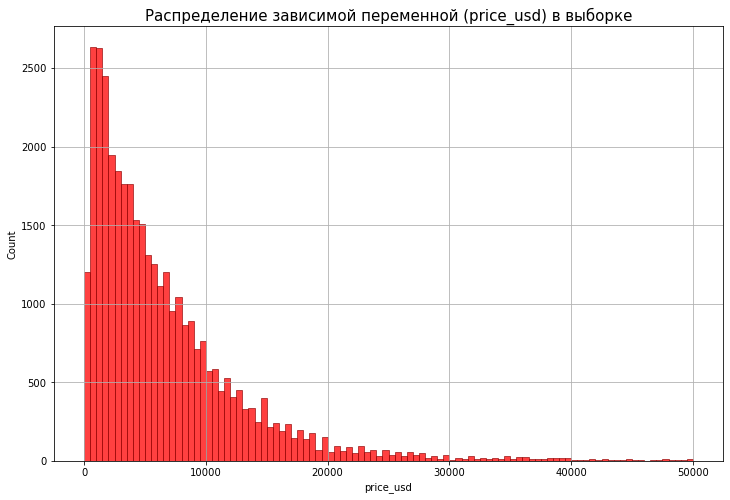

In [204]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Распределение зависимой переменной (price_usd) в выборке', fontsize=15)
sns.histplot(df["price_usd"], bins=100, ax=ax, color='red', edgecolor="darkred")
plt.grid()
plt.show()

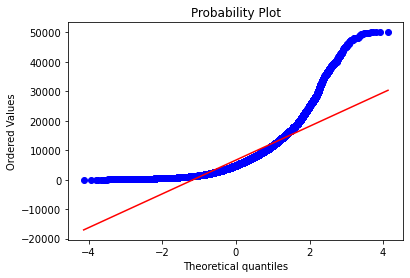

In [16]:
stats.probplot(df["price_usd"], dist="norm", plot=pylab) ##QQ Plot
pylab.show()

In [18]:
from scipy.stats import chisquare

stat, pvalue = chisquare(df["price_usd"])
stat, pvalue

If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian

In [21]:
from scipy.stats import jarque_bera

stat, pvalue = jarque_bera(df["price_usd"])
stat, pvalue

If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian

Боксплоты:

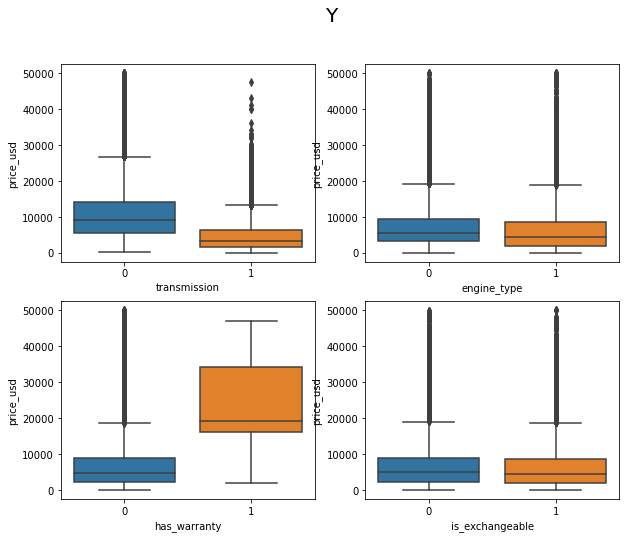

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Y', fontsize=20)
sns.boxplot(data=df, y="price_usd", x="transmission",ax=axs[0,0])
sns.boxplot(data=df, y="price_usd", x="engine_type", ax=axs[0,1])
sns.boxplot(data=df, y="price_usd", x="has_warranty", ax=axs[1,0])
sns.boxplot(data=df, y="price_usd", x="is_exchangeable", ax=axs[1,1]);

In [24]:
from sklearn.linear_model import LinearRegression

#разделение на x и y
x = df.drop(columns = "price_usd")
y = df["price_usd"]

model = LinearRegression().fit(x, y)

print(model.intercept_, model.coef_, model.score(x, y)) #последнее это R^2

In [ ]:
======

In [28]:
import statsmodels.api as sm

In [29]:
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

## Выбор между моделями

### Тест Зарембки

In [239]:
from scipy.stats import gmean

In [244]:
df3 = df.copy()

df3["price_usd"] = df3["price_usd"] / gmean(df3["price_usd"])
df3 = df3.rename(columns = {"price_usd" : "price_usd_gmean"})

Рассчитываем следующую линейную регрессию: <br>
<img src="https://i.imgur.com/BpOA39q.png" alt="Drawing" style="width: 250px;"/>

In [252]:
x = sm.add_constant(x)
model1 = ols(
    "price_usd_gmean ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df3).fit()

Рассчитываем следующую логарифмическую регрессию: <br>
<img src="https://i.imgur.com/EGKk36V.png" alt="Drawing" style="width: 300px;"/>

In [254]:
df3["log_price_usd_gmean"] = np.log(df3["price_usd_gmean"])

In [256]:
x = sm.add_constant(x)
model2 = ols(
    "log_price_usd_gmean ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df3).fit()

Вычисляем Хи квадрат статистику: <br>
<img src="https://i.imgur.com/wvpc0Ea.png" alt="Drawing" style="width: 300px;"/>

In [269]:
# rss1 = model1.ssr
# rss2 = model2.ssr
n = y.shape[0]
chi_stat = (n/2)*np.absolute(np.log(rss1/rss2))

In [271]:
chi_stat 

22756.218899773678

Полученный результат намного больше $Хи_{crit}$. Значит $H_0$ отвергается и между линейной и полулогарифмической моделью есть различия, а значит предпочтительнее использовать ту модель, у которой меньше RSS. (Полулогарифмическую модель, так как у нее меньше RSS.) 

Оценим модели:

__Линейная модель:__

In [290]:
x = sm.add_constant(x)
model1 = ols(
    "price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df).fit()

print(model1.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model1)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     7589.
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:52:46   Log-Likelihood:            -3.5720e+05
No. Observations:               36937   AIC:                         7.144e+05
Df Residuals:                   36927   BIC:                         7.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.389e+05 

__Полулогарифмическая модель__

*Используем log(1+x) логарифмирование, так как в независимых переменных есть нули, и мы не сможем сравнить модели далее

In [295]:
df1 = df.copy()

df1['price_usd'] = df1['price_usd'].apply(lambda x: np.log1p(x)) #логарифмированный Y 
df1 = df1.rename(columns = {"price_usd" : "log_price_usd"})

x = sm.add_constant(x)
model2 = ols(
    "log_price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df1).fit()

print(model2.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model2)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:          log_price_usd   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:01:48   Log-Likelihood:                -26505.
No. Observations:               36937   AIC:                         5.303e+04
Df Residuals:                   36927   BIC:                         5.312e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -176.3083 

In [296]:
rss1 = model1.ssr
rss2 = model2.ssr

print("RSS линейной модели:", rss1)
print("RSS полулогарифмической модели:", rss2)

RSS линейной модели: 542909629983.11646
RSS полулогарифмической модели: 9083.93205340836


Видим, что у полулогарифмической модели гораздо меньше RSS, и выше $R^2$. Значит, будем использовать полулогарифмическую модель.

Теперь сравним также полулогарифмическую модель с логарифмической моделью:

__Логарифмическая модель__

In [298]:
df2 = df.copy()

df2[(df2["odometer_value"] == 0) | (df2["duration_listed"] == 0)] #есть нулевые значения => используем log(1 + x)

df2[['odometer_value', 'year_produced', 'engine_capacity','number_of_photos', 'duration_listed', "price_usd"]] = df2[
    ['odometer_value', 'year_produced', 'engine_capacity','number_of_photos', 'duration_listed', "price_usd"]].apply(
    lambda x: np.log1p(x))

df2 = df2.rename(columns = {"price_usd" : "all_log_price_usd"})

x = sm.add_constant(x)
model3 = ols(
    "all_log_price_usd ~ odometer_value + year_produced + engine_capacity + number_of_photos + duration_listed + transmission + engine_type + has_warranty + is_exchangeable", 
            df2).fit()

print(model3.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model3)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:      all_log_price_usd   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.380e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:03:58   Log-Likelihood:                -26201.
No. Observations:               36937   AIC:                         5.242e+04
Df Residuals:                   36927   BIC:                         5.251e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1432.6224 

Мы видим, что $R^2_{adj} = 0.771$ для логарифмической модели, тогда как у полулогарифмической он равен 0.767. Различие не слишком большое, однако для логарифмической модели он больше, поэтому будем использовать её. 

In [299]:
df2

,odometer_value,year_produced,engine_capacity,number_of_photos,duration_listed,transmission,engine_type,engine_fuel,has_warranty,is_exchangeable,all_log_price_usd
0,12.154785,7.606387,1.252763,2.302585,2.833213,0,1,1,0,0,9.296610
1,12.577640,7.602401,1.386294,2.564949,4.430817,0,1,1,0,1,8.517393
2,12.904210,7.601902,1.252763,1.609438,5.023881,0,1,1,0,1,7.937732
3,9.210440,7.600902,1.386294,2.302585,4.465908,1,1,1,0,1,9.210340
4,12.542548,7.601902,1.252763,2.708050,2.079442,0,1,1,0,1,7.666273
...,...,...,...,...,...,...,...,...,...,...,...
38526,12.577640,7.601402,1.504077,1.791759,5.710427,0,1,1,0,1,7.919720
38527,12.679200,7.603399,1.163151,1.609438,5.762051,1,0,0,0,1,8.476580
38528,13.564428,7.601402,1.504077,1.386294,5.913503,0,1,1,0,0,8.366603
38529,9.903538,7.601902,1.098612,2.079442,6.196444,1,1,1,0,1,8.294300
